### Correlation vaxx rate v.s. census factors

In [60]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [37]:
df = pd.read_csv('../cleaning_etl/cleanjoin1718.csv')

In [20]:
print(df.columns)
print(df.shape)

Index(['facility_num', 'county', 'is_public', 'city', 'facility_name',
       'enrollment', 'n', 'pct', 'vac_info_type', 'reported', 'geoid',
       'geoid2', 'tot_pop', 'male', 'male_pct', 'female', 'female_pct',
       'under_5', 'under_5_pct', '5_9', '5_9_pct', '10_14', '10_14_pct',
       '15_19', '15_19_pct', '20_24', '20_24_pct', '25_34', '25_34_pct',
       '35_44', '35_44_pct', '45_54', '45_54_pct', '55_59', '55_59_pct',
       '60_64', '60_64_pct', '65_74', '65_74_pct', '75_84', '75_84_pct',
       '85_over', '85_over_pct', 'median_age', 'median_age_pct',
       'hispanic_latino', 'hispanic_latino_pct', 'white', 'white_pct', 'black',
       'black_pct', 'aian', 'aian_pct', 'asian', 'asian_pct', 'nhopi',
       'nhopi_pct', 'other', 'other_pct', 'median_income', 'insurance',
       'insurance_pct', 'private_insure', 'private_insure_pct',
       'public_insure', 'public_insure_pct', 'no_insurance',
       'no_insurance_pct'],
      dtype='object')
(18433, 68)


In [51]:
df[:1]

,facility_num,county,is_public,city,facility_name,enrollment,n,pct,vac_info_type,reported,...,other_pct,median_income,insurance,insurance_pct,private_insure,private_insure_pct,public_insure,public_insure_pct,no_insurance,no_insurance_pct
0,10214883,Alameda,HEAD START,Alameda,ALAMEDA HEAD START . ANGELA AGUILAR CENTER,63,61,98,ChildCareData,Y,...,12.5,83048.0,70366.0,92.7,58794.0,77.5,20088.0,26.5,5528.0,7.3


In [54]:
cols = [ 'enrollment', 'n', 'pct', 'tot_pop', 'male_pct', 'female_pct',
         'under_5_pct', '5_9_pct', '10_14_pct', '15_19_pct', '20_24_pct', '25_34_pct', '35_44_pct',
         '45_54_pct', '55_59_pct', '60_64_pct', '65_74_pct', '75_84_pct', '85_over_pct',
         'median_age', 'hispanic_latino_pct', 'white_pct', 'black_pct', 'aian_pct', 'asian_pct',
         'nhopi_pct', 'other_pct', 'median_income', 'insurance_pct',  'private_insure_pct',
         'public_insure_pct', 'no_insurance_pct']

df[cols].head()

,enrollment,n,pct,tot_pop,male_pct,female_pct,under_5_pct,5_9_pct,10_14_pct,15_19_pct,...,black_pct,aian_pct,asian_pct,nhopi_pct,other_pct,median_income,insurance_pct,private_insure_pct,public_insure_pct,no_insurance_pct
0,63,61,98,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
1,47,44,95,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
2,44,41,95,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
3,109,107,99,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
4,100,99,99,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3


In [ ]:
print(len(df[df.is_public == 'HEAD START'].is_public))
print(len(df[df.is_public == 'PUBLIC'].is_public))
print(len(df[df.is_public == 'PRIVATE'].is_public))

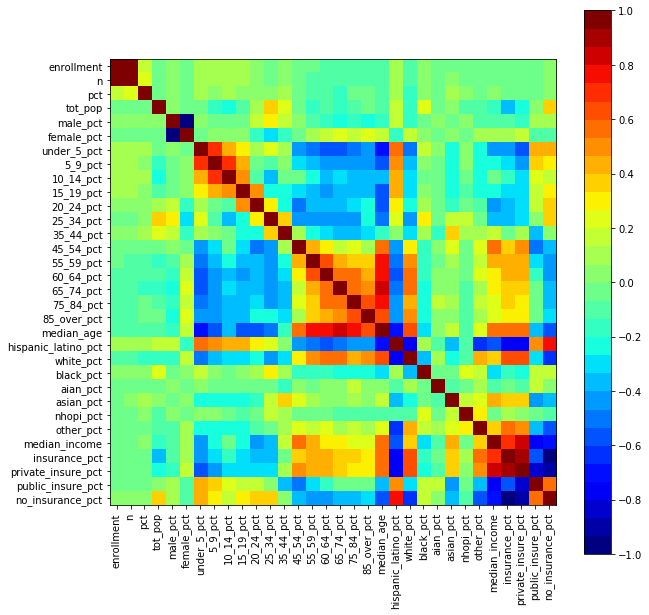

In [66]:
def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Args:
        - df: pandas DataFrame
        - size: vertical and horizontal size of the plot
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = cm.get_cmap('jet', 30)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    fig.colorbar(cax, ticks=[-1, -.8, -.6,-.4,-.2,0.0, .2, .4, .6, .8, 1])

plot_corr(df[cols])

In [72]:
df_county1617 = pd.read_csv('../cleaning_etl/vac_pct_county_table1617.CSV')
df_pop1617 = pd.read_csv('../cleaning_etl/pop_data16.csv')

In [74]:
df_pop1617.columns

Index(['geoid', 'geoid2', 'city', 'tot_pop', 'male', 'male_pct', 'female',
       'female_pct', 'under_5', 'under_5_pct', '5_9', '5_9_pct', '10_14',
       '10_14_pct', '15_19', '15_19_pct', '20_24', '20_24_pct', '25_34',
       '25_34_pct', '35_44', '35_44_pct', '45_54', '45_54_pct', '55_59',
       '55_59_pct', '60_64', '60_64_pct', '65_74', '65_74_pct', '75_84',
       '75_84_pct', '85_over', '85_over_pct', 'median_age', 'median_age_pct',
       'hispanic_latino', 'hispanic_latino_pct', 'white', 'white_pct', 'black',
       'black_pct', 'aian', 'aian_pct', 'asian', 'asian_pct', 'nhopi',
       'nhopi_pct', 'other', 'other_pct', 'median_income', 'insurance',
       'insurance_pct', 'private_insure', 'private_insure_pct',
       'public_insure', 'public_insure_pct', 'no_insurance',
       'no_insurance_pct'],
      dtype='object')

In [73]:
df_pop1617 = df_pop1617['city', ]

,geoid,geoid2,city,tot_pop,male,male_pct,female,female_pct,under_5,under_5_pct,...,other_pct,median_income,insurance,insurance_pct,private_insure,private_insure_pct,public_insure,public_insure_pct,no_insurance,no_insurance_pct
0,1600000US0600135,600135,Acalanes Ridge,1000,409,40.9,591,59.1,33,3.3,...,32.2,187604.0,988,98.8,952,95.2,149,14.9,12,1.2
1,1600000US0600156,600156,Acampo,466,291,62.4,175,37.6,0,0.0,...,0.0,155385.0,451,96.8,451,96.8,98,21.0,15,3.2
2,1600000US0600212,600212,Acton,7170,3776,52.7,3394,47.3,350,4.9,...,3.6,91168.0,6582,92.0,5798,81.0,1660,23.2,575,8.0
3,1600000US0600296,600296,Adelanto,32311,16350,50.6,15961,49.4,3148,9.7,...,6.3,29647.0,26528,86.7,9306,30.4,18268,59.7,4068,13.3
4,1600000US0600310,600310,Adin,155,59,38.1,96,61.9,7,4.5,...,6.4,55625.0,150,96.8,111,71.6,62,40.0,5,3.2


In [70]:
df_county1718.head()

,Unnamed: 0,county,vac_info_type,pct
0,0,Alameda,7thGradeData,96.408759
1,1,Alameda,ChildCareData,95.118881
2,2,Alameda,KindergartenData,96.327138
3,3,Amador,7thGradeData,97.666667
4,4,Amador,ChildCareData,91.666667
